In [ ]:
#from pnp import poisson_solver, run_solver
import numpy as np
import os, sys, re, glob
from dolfin import *
from __future__ import print_function
from fenics import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
font = {'family' : 'Times New Roman',
        'weight' : 'regular',
        'size'   : 16}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.rc('axes', linewidth=2)
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['xtick.major.size'] = 20                                                                                                                                     
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

In [6]:
# Load Mesh
loc = '../'
mesh = Mesh(loc+'mesh.xml');
cd=MeshFunction('size_t',mesh,loc+'mesh_physical_region.xml')
fd=MeshFunction('size_t',mesh,loc+'mesh_facet_region.xml')

## Test Poisson

Solving linear variational problem.


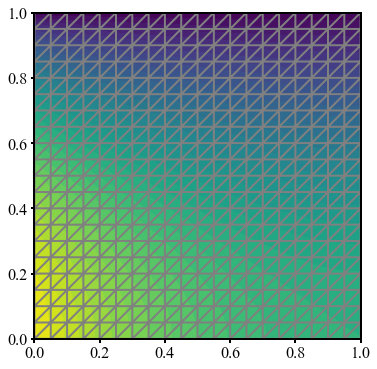

In [6]:
# Test poisson (steady state heat eq) solve
mesh = UnitSquareMesh(20, 20)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
#u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
phi_D = Expression('0 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)
phi_L = Expression('1 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

phi = TrialFunction(V)
v = TestFunction(V)

# Radial
k = 1
r = Expression('x[0]', degree=1)
#a = k*(Dx(phi,0)*Dx(v,0) + Dx(phi,1)*Dx(v,1))*r*dx()
a = k*(dot(grad(phi),grad(v)))*r*dx()
f = Constant(1.0)
#g = Expression('-4*x[1]', degree=1)
g = Expression('0.0', degree=1)

tol = 1E-14
L = f*v*dx - g*v*ds
def boundary_z(x, on_boundary):
    return on_boundary and (near(x[1], 0, tol) or near(x[1], 1, tol))

def boundary_r(x, on_boundary):
    return on_boundary and near(x[1], 1, tol)

bc_1= DirichletBC(V, phi_D, boundary_z)
bc_2= DirichletBC(V, phi_D, boundary_r)
#bcs = [bc_r, bc_z]
bcs = [bc_2]

'''
# Cartesian
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx
bcs = DirichletBC(V, u_D, boundary)
'''

# Compute solution
phi = Function(V)
solve(a == L, phi, bcs)

# Plot solution and mesh
plot(phi)
plot(mesh)
#interactive()

In [5]:
phi(0,0.5)

-96230761268602.12

In [83]:
error_L2 = errornorm(phi_D, phi, 'L2')

# Compute maximum error at vertices
vertex_values_phi_D = phi_D.compute_vertex_values(mesh)
vertex_values_phi = phi.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_phi_D - vertex_values_phi))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.error_L2  =
 0.24739740449380657
error_max = 0.5912211691647401


In [8]:
interactive()

NameError: name 'interactive' is not defined

## Test NP

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


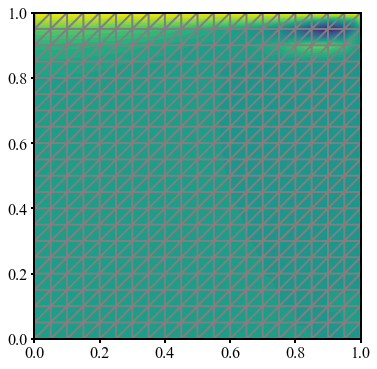

In [14]:
# Test NP solve
#mesh = UnitSquareMesh(20, 20)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
#u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
c_D = Expression('1 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)
c_L = Expression('0 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

c = TrialFunction(V)
q = TestFunction(V)

# Radial
z = 1 # Charge number
kbT = 0.0259 # eV, room temp
r = Expression('x[0]', degree=1)
a = ((dot(grad(c), grad(q))) - ((z*1/kbT)*(dot(grad(c), grad(phi)))*q))*r*dx()
#a = k*(Dx(c,0)*Dx(q,0) + Dx(c,1)*Dx(q,1))*r*dx()
f = Constant(0.0)
#g = Expression('-4*x[1]', degree=1)
g = Expression('0.0', degree=1)

tol = 1E-14
L = f*q*dx + g*q*ds
def boundary_z(x, on_boundary):
    return on_boundary and (near(x[1], 1, tol))

def boundary_r(x, on_boundary):
    return on_boundary and near(x[0], 1, tol)

bc_z= DirichletBC(V, c_D, boundary_z)
bc_r= DirichletBC(V, c_L, boundary_r)
bcs = [bc_r, bc_z]
#bcs = [bc_z]


# Compute solution
c = Function(V)
solve(a == L, c, bcs)

# Plot solution and mesh
plot(c)
plot(mesh)

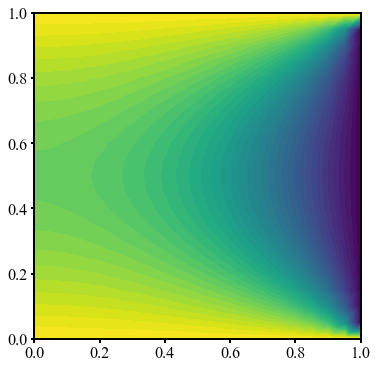

In [113]:
plot(u)

## Test coupled PNP

Solving linear variational problem.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.345e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.779e-01 (tol = 1.000e-10) r (rel) = 2.066e-02 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 5.285e-02 (tol = 1.000e-10) r (rel) = 3.929e-03 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 6.856e-03 (tol = 1.000e-10) r (rel) = 5.098e-04 (tol = 1.000e-09)
  Newton iteration 4: r (abs) = 2.181e-04 (tol = 1.000e-10) r (rel) = 1.622e-05 (tol = 1.000e-09)
  Newton iteration 5: r (abs) = 2.445e-07 (tol = 1.000e-10) r (rel) = 1.818e-08 (tol = 1.000e-09)
  Newton iteration 6: r (abs) = 3.017e-13 (tol = 1.000e-10) r (rel) = 2.243e-14 (tol = 1.000e-09)
  Newton solver finished in 6 iterations and 6 linear solver iterations.


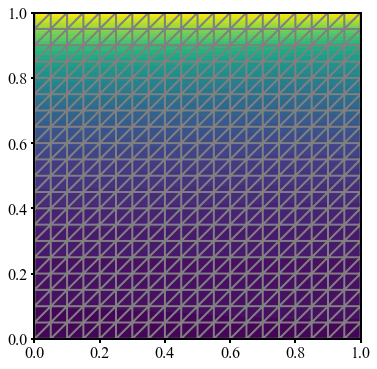

In [97]:
mesh = UnitSquareMesh(20, 20)

## Constants Radial
z_1 = 1 # Charge number
z_2 = -1
eps = 80
eps0 = 8.854187e-12 # Vacuum permittivity F/m
e = 1.60218e-19 # Coulombs 
kbT = 0.0259 # eV, room temp
F = 96485.332 # C/mol
a = (1/kbT)
b = a*(F/(eps*eps0))
a, b = 1, 10

## initialize phi
V_phi = FunctionSpace(mesh, 'P', 1)

phi_D = Expression('0 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)
phi_L = Expression('1 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

phi = TrialFunction(V_phi)
v = TestFunction(V_phi)


## initialize conc
P1 = FiniteElement('P', triangle, 1)
element = MixedElement([P1, P1])
V_c = FunctionSpace(mesh, element)

c_D = Expression('0 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)
c_L = Expression('1 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)

q_1, q_2 = TestFunctions(V_c)
c = Function(V_c)
c_1, c_2 = split(c)

# BCs
def boundary_z(x, on_boundary):
    return on_boundary and (near(x[1], 0, tol) or near(x[1], 1, tol))

def boundary_r(x, on_boundary):
    return on_boundary and near(x[0], 1, tol)

bc_z= DirichletBC(V_phi, phi_D, boundary_z)
bc_r= DirichletBC(V_phi, phi_L, boundary_r)
bcs_phi = [bc_r, bc_z]

def boundary_z(x, on_boundary):
    return on_boundary and (near(x[1], 1, tol))

def boundary_r(x, on_boundary):
    return on_boundary and near(x[0], 1, tol)

#bc_z= DirichletBC(V.sub(1), c_D, boundary_z)
bc_z= DirichletBC(V_c.sub(0), c_L, boundary_z)
bc_r= DirichletBC(V_c.sub(1), c_D, boundary_r)
#bcs = [bc_r]
bcs_c = [bc_r, bc_z]

### Compute solution
## Define problem for phi
tol = 1E-14
r = Expression('x[0]', degree=1)
F_phi = (dot(grad(phi),grad(v)))*r*dx()
nabla_phi = (z_1*c_1 + z_2*c_2)
#f = Constant(0.0)
#g = Expression('-4*x[1]', degree=1)
g = Expression('0.0', degree=1)

L_phi = nabla_phi*v*dx - g*v*ds
phi = Function(V_phi)
solve(F_phi == L_phi, phi, bcs_phi)

## Define problem for conc
tol = 1E-14
r = Expression('x[0]', degree=1)
g_1 = Expression('0.0', degree=1)
g_2 = Expression('0.0', degree=1)
F_c = ((dot(grad(c_1), grad(q_1))) - ((z_1*a)*(dot(grad(c_1), grad(phi)))*q_1))*r*dx() \
    + ((dot(grad(c_2), grad(q_2))) - ((z_2*a)*(dot(grad(c_2), grad(phi)))*q_2))*r*dx() \
    + ((z_1*c_1*q_1 + z_2*c_2*q_2)*b*nabla_phi)*r*dx() - g_1*q_1*r*ds() - g_1*q_2*r*ds()

L_c = 0
solve(F_c == L_c, c, bcs_c)
_c_1, _c_2 = c.split()

## Plot solution and mesh
plot(_c_1)
plot(mesh)

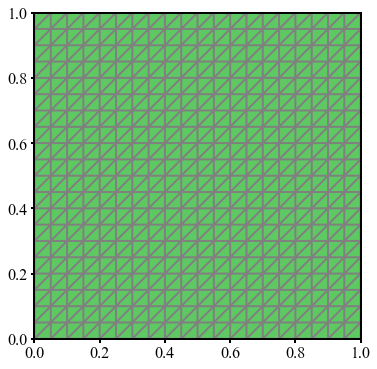

In [98]:
plot(_c_2)
plot(mesh)

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 9.008e-11 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton solver finished in 0 iterations and 0 linear solver iterations.


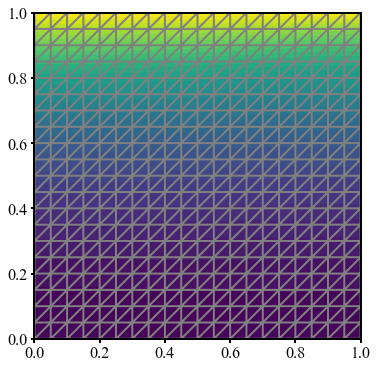

In [81]:
F_c = ((dot(grad(c_1), grad(q_1))) - ((z_1*a)*(dot(grad(c_1), grad(phi)))*q_1))*r*dx() \
    + ((dot(grad(c_2), grad(q_2))) - ((z_2*a)*(dot(grad(c_2), grad(phi)))*q_2))*r*dx() \
    + ((z_1*c_1*q_1 + z_2*c_2*q_2)*b*nabla_phi)*r*dx()
solve(F_c == L_c, c, bcs_c)
_c_1, _c_2 = c.split()

## Plot solution and mesh
plot(_c_1)
plot(mesh)

In [75]:
L_c

0

In [183]:
e = 1.60218e-19 # Coulombs
a = (1/kbT)
b = a*(F/(eps*eps0))
F = 96485.332 # C/mol
RT = 8.3144*298
b

5259238360651285.0

## Test 2 PNP

No Jacobian form specified for nonlinear variational problem.          Calling FFC just-in-time (JIT) compiler, this may take some time.

Differentiating residual form F to obtain Jacobian J = F'.
          Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.345e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.779e-02 (tol = 1.000e-10) r (rel) = 2.066e-03 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.441e-03 (tol = 1.000e-10) r (rel) = 1.072e-04 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 5.750e-06 (tol = 1.000e-10) r (rel) = 4.275e-07 (tol = 1.000e-09)
  Newton iteration 4: r (abs) = 9.008e-11 (tol = 1.000e-10) r (rel) = 6.697e-12 (tol = 1.000e-09)
  Newton solver finished in 4 iterations and 4 linear solver iterations.


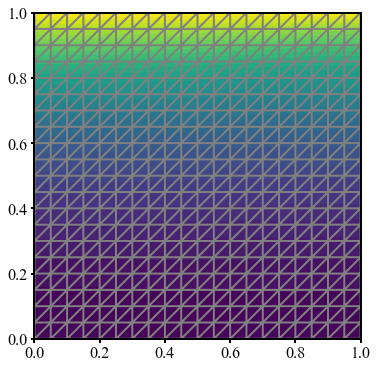

In [92]:
P1 = FiniteElement('P', triangle, 1)
element = MixedElement([P1, P1])
V = FunctionSpace(mesh, element)

# Define boundary condition
#u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
c_D = Expression('0 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)
c_L = Expression('1 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

q_1, q_2 = TestFunctions(V)
c = Function(V)
c_1, c_2 = split(c)

# Radial
z_1 = 1 # Charge number
z_2 = -1
eps = 80
eps0 = 8.854187e-12 # Vacuum permittivity F/m
e = 1.60218e-19 # Coulombs 
kbT = 0.0259 # eV, room temp
F = 96485.332 # C/mol
a = (1/kbT)
b = a*(F/(eps*eps0))
a, b = 1, 1

r = Expression('x[0]', degree=1)
nabla_phi = (z_1*c_1 + z_2*c_2)
g_1 = Expression('0.0', degree=1)
g_2 = Expression('0.0', degree=1)
F = ((dot(grad(c_1), grad(q_1))) - ((z_1*a)*(dot(grad(c_1), grad(phi)))*q_1))*r*dx() \
    + ((dot(grad(c_2), grad(q_2))) - ((z_2*a)*(dot(grad(c_2), grad(phi)))*q_2))*r*dx() \
    + ((z_1*c_1*q_1 + z_2*c_2*q_2)*b*nabla_phi)*r*dx() - g_1*q_1*r*ds() - g_1*q_2*r*ds()
    

tol = 1E-14
#L = g*q_1*r*dx()
L = 0
def boundary_z(x, on_boundary):
    return on_boundary and (near(x[1], 1, tol))

def boundary_r(x, on_boundary):
    return on_boundary and near(x[0], 1, tol)

bc_z= DirichletBC(V.sub(1), c_D, boundary_z)
bc_z= DirichletBC(V.sub(0), c_L, boundary_z)
bc_r= DirichletBC(V.sub(1), c_D, boundary_r)
#bcs = [bc_r]
bcs = [bc_r, bc_z]

# Compute solution

solve(F == L, c, bcs)
_c_1, _c_2 = c.split()

# Plot solution and mesh
plot(_c_1)
plot(mesh)

# Test 3 PNP

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.942e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.696e-09 (tol = 1.000e-10) r (rel) = 8.734e-11 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


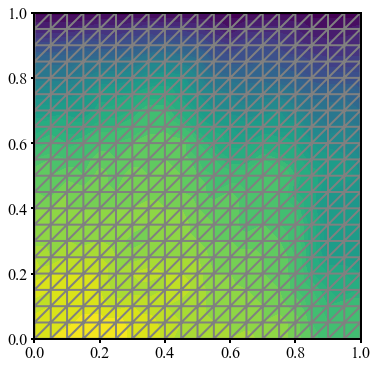

In [103]:
P1 = FiniteElement('P', triangle, 1)
element = MixedElement([P1, P1])
V = FunctionSpace(mesh, element)

# Define boundary condition
c_D = Expression('0 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)
c_L = Expression('1 + 0*x[0]*x[0] + 0*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

q_1, q_2 = TestFunctions(V)
c = Function(V)
c_1, c_2 = split(c)

# Constants
z_1 = 1 # Charge number
z_2 = -1
eps = 80
eps0 = 8.854187e-12 # Vacuum permittivity F/m
e = 1.60218e-19 # Coulombs 
kbT = 0.0259 # eV, room temp
F = 96485.332 # C/mol
a = (1/kbT)
b = a*(F/(eps*eps0))
a, b = 1, 10000000

r = Expression('x[0]', degree=1)
nabla_phi = (z_1*c_1 + z_2*c_2)

F = (dot(grad(c_1), grad(q_1)))*r*dx() \
    + (dot(grad(c_2), grad(q_2)))*r*dx() \
    + ((z_1*c_1*q_1 + z_2*c_2*q_2)*b*nabla_phi)*r*dx() 
    
g = Expression('1.0', degree=2)

tol = 1E-14
#L = g*q_1*ds + g*q_2*ds
L = 0
def boundary_z(x, on_boundary):
    return on_boundary and (near(x[1], 1, tol))

def boundary_r(x, on_boundary):
    return on_boundary and near(x[0], 1, tol)

bc_z= DirichletBC(V.sub(1), c_D, boundary_z)
bc_z= DirichletBC(V.sub(0), c_L, boundary_z)
bc_r= DirichletBC(V.sub(1), c_L, boundary_r)
bcs = [bc_r, bc_z]

# Compute solution
solve(F == L, c, bcs)
_c_1, _c_2 = c.split()

# Plot solution and mesh
plot(_c_1)
plot(mesh)

# Define functions

In [8]:
def poisson_solver(f, u_D, mesh, degree=1):
    """
    Solve -Laplace(u) = f on [0,1] x [0,1] with 2*Nx*Ny Lagrange
    elements of specified degree and u = u_D (Expresssion) on
    the boundary.
    """
    
    # Define function space
    V = FunctionSpace(mesh, 'P', degree)

    # Define boundary condition
    def boundary(x, on_boundary):
        return on_boundary

    bc = DirichletBC(V, u_D, boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    return u

Solving linear variational problem.


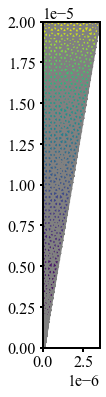

In [9]:
def run_solver():
    "Run solver to compute and post-process solution"

    # Set up problem parameters and call solver
    u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
    f = Constant(-6.0)
    u = poisson_solver(f, u_D, mesh, 1)

    # Plot solution and mesh
    plot(u)
    plot(mesh)

    # Save solution to file in VTK format
    #vtkfile = File('poisson_solver/solution.pvd')
    #vtkfile << u
run_solver()

In [ ]:
# NP solver
def NP_solver(f, u_D, mesh, degree=1):
    """
    Solve -Laplace(u) = f on [0,1] x [0,1] with 2*Nx*Ny Lagrange
    elements of specified degree and u = u_D (Expresssion) on
    the boundary.
    """
    
    # Define function space
    V = FunctionSpace(mesh, 'P', degree)

    # Define boundary condition
    def boundary(x, on_boundary):
        return on_boundary

    bc = DirichletBC(V, u_D, boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    return u